In [2]:
import numpy as np
import matplotlib.pyplot as plt


***


### <font color='red'> Activity 1: Solve the following LP problem graphically using the level curves in this week's lab notebook </font>

\begin{array}{ll}
\operatorname{maximize} & 4 X_1+5 X_2 \\
\text { subject to } & 2 X_1+3 X_2 \leq 120 \\
& 4 X_1+3 X_2 \leq 140 \\
& X_1+X_2 \geq 80 \\
& X_1 \geq 0 \\
& X_2 \geq 0
\end{array}




<a list of 10 text.Text objects>

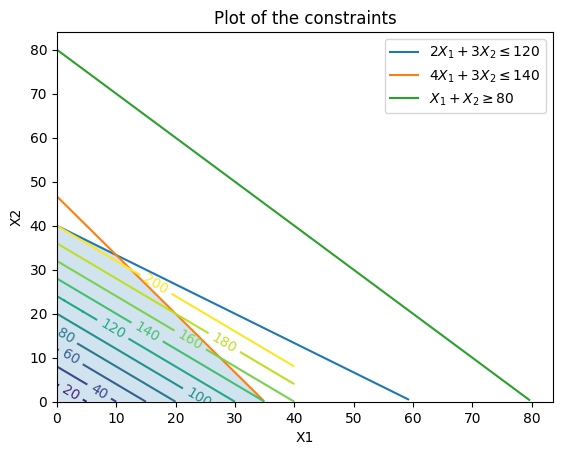

In [3]:
X1 = np.linspace(0, 100)

X21 = (120 - 2*X1)/3
X22 = (140 - 4*X1)/3
X23 = 80 - X1
plt.plot(X1[np.where(X21 > 0)[0]], X21[np.where(X21 > 0)[0]], label=r'$2 X_1 + 3 X_2 \leq 120$')
plt.plot(X1[np.where(X22 > 0)[0]], X22[np.where(X22 > 0)[0]], label=r'$4 X_1 + 3 X_2 \leq 140$')
plt.plot(X1[np.where(X23 > 0)[0]], X23[np.where(X23 > 0)[0]], label=r'$X_1 + X_2 \geq 80$')

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Plot of the constraints")

plt.fill_between(X1, np.minimum(np.minimum(X21, X22), X23), where=(X21 >= 0) & (X22 >= 0) & (X23 >= 0), alpha=0.2)
# plt.fill_between(X1, np.minimum(X21, X22),  alpha=0.2)

objective = lambda k, b: 4*k + 5*b
kVal = np.linspace(0, 40, 400)
bVal = np.linspace(0, 40, 400)
K, B = np.meshgrid(kVal, bVal)
S = objective(K, B)
contour = plt.contour(K, B, S, levels=np.arange(0, 220, 20), cmap='viridis')
plt.clabel(contour, inline=1, fontsize=10)


### <font color='red'> Activity 2: Code for solving system of linear equations. </font>
Write code in this week’s lab for solving a system of linear equations in form of y = Ax. 
Note, you should use LU decomposition algorithm that we discussed in the lecture, and then 
use forward and backward substitution to find a value of x



<img src="../pics/lu-decomposition.png">

<img src="../pics/forward-substitution.png">

<img src="../pics/backward-substitution.png">

In [102]:
from copy import deepcopy

def LUdecomposition(A_orig):
    A = deepcopy(A_orig) # shape: (n, m)
    n = len(A) # n = A.rows
    L = np.zeros((n, n)) # New matrices L and U of size n x n
    U = np.zeros((n, n))
    np.fill_diagonal(L, 1) # Fill the diagonal of L with 1s
    
    for k in range(n):
        U[k][k] = A[k, k]
        print(f'A[{k}][{k}]: ', A[k][k])
        print(f'U[{k}][{k}]: ', U[k][k])
        for i in range(k + 1, n):
            
            L[i][k] = A[i, k] / U[k][k]
            U[k][i] = A[k, i]
        for i in range(k + 1, n):
            for j in range(k + 1, n):
           
                print(f'L[{i}][{k}]: ', L[i][k])
      
                A[i, j] = A[i, j] - L[i][k]*U[k][j]
                
    return L, U

def LUdecomposition3(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range(n):
        # Upper Triangular Matrix
        for k in range(i, n):
            sum_ = 0
            for j in range(i):
                sum_ += L[i][j] * U[j][k]
            U[i][k] = A[i][k] - sum_

        # Lower Triangular Matrix
        for k in range(i, n):
            if i == k:
                L[i][i] = 1  # Diagonal entries of L are 1
            else:
                sum_ = 0
                for j in range(i):
                    sum_ += L[k][j] * U[j][i]
                L[k][i] = (A[k][i] - sum_) / U[i][i]

    return L, U
def LUdecomposition1(A_orig: list) -> list: 
    A = deepcopy(A_orig) # shape: (n, m)
    n = len(A) # create variable n as number of rows in A
    U = [[None] * n for _ in range(n)] # generate matrix U  (n, n)
    L = [[None] * n for _ in range(n)] # generate matrix L  (n, n)
     
    # initialise intial values of L and U 
    for i in range(n): 
        for j in range(n): 
            if j < i: 
                U[i][j] = 0 # 0 below the diagonal
            elif j == i: 
                L[i][j] = 1 # 1 on the diagonal
            else: 
                L[i][j] = 0 # 0 above the diagnal
    for k in range(n): 
        U[k][k] = A[k][k]
        for i in range(k+1, n): 
            L[i][k] = A[i][k]/U[k][k] 
            U[k][i] = A[k][i]
        for i in range(k+1, n): 
            for j in range(k+1, n): 
                A[i][j] = A[i][j] - L[i][k]*U[k][j]
    return L, U 

def LUdecomposition2(A_orig):
    A = deepcopy(A_orig) # shape: (n, m)
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        L[i, i] = 1
    
    for k in range(n):
        U[k,k] = A[k,k]
        for i in range(k+1,n):
            L[i,k] = A[i,k] / U[k,k]
            U[k,i] = A[k,i]
        for i in range(k+1,n):
            for j in range(k+1,n):
                
                A[i,j] = A[i,j] - L[i,k]*U[k,j]
    return L, U



def forward_substitution(L, b):
    # Lx = b
    n = len(L)
    x = np.zeros(n)
    for i in range(n):
        x[i] = b[i]
        for j in range(i):
            x[i] -= L[i][j] * x[j]
        x[i] = x[i]/L[i][i]

    return x

def backward_substitution(U, b):
    # Ux = b
    n = len(U)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= U[i][j] * x[j]
        x[i] = x[i] / U[i][i]
  
    return x

def forward_substitution1(r, b):
    d = len(b)
    n = np.zeros(d)
    for x in range(d):
        n[x] = b[x] - np.dot(r[x], n)
    return n
    
def backward_substitution1(k, n):
    d = len(n)
    m = np.zeros(d)
    for x in range(d - 1, -1, -1):
        m[x] = (n[x] - np.dot(k[x, x+1:], m[x+1:])) / k[x, x]
    return m


def forward_substitution2(L, b):
    n = len(b)
    y = np.zeros(n)
    #Ly = b, calculate from the first equation
    for i in range(n):
        y[i] = b[i] - sum(L[i, k] * y[k] for k in range(i)) #  np.dot(L[i, :i], b[:i])
    return y


def backward_substitution2(U, y):
    n = len(y) 
    x = np.zeros(n)
    #Ux = y, calculate from the last equation
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - sum(U[i, k] * x[k] for k in range(i+1, n))) / U[i, i]
    return x

def solveSystemLinearEquations(A, b):
    # solve b = Ax
    
    # A = LU
    L, U = LUdecomposition3(A)
    
    # b = L*Ux*
    # b = L*y* if Ux = y 
    
    y = forwardSub(L, b)
    
    # y = Ux
    x = backwardSub(U, y)
    
    return x

def test1():
    A= np.array([[1, -5, 6], 
                [8, -6, 7], 
                [12, -7, 12]])
    b = np.array([50, 60, 70], )
    x = solveSystemLinearEquations(A, b)
    print("Solution is",x)
    print(np.dot(A, x))
    print( b)

def test2():
    A = np.array([[3, 2, -1],
              [2, -2, 4], 
              [1, 1, 3]])
    b = np.array([1, -2, 3])
    x = solveSystemLinearEquations(A, b) # LUdecomposition3 is correct but LUdecomposition is not
    print("Solution is",x)
    print(np.dot(A, x))
    print( b)

def test3():
    A = np.array([[2, 1, -1],
        [-3, -1, 2],
        [-2, 1, 2]])
    print(A)
    b = np.array([8, -11, -3])

    x = solveSystemLinearEquations(A, b) # LUdecomposition3 is correct but LUdecomposition is not

    print("Solution is",x)
    print(np.dot(A, x))
    print( b)
test2()

def test4():
    A = np.array([[2, -1],[1, 3]])
    b = np.array([1, 7])

    x = solveSystemLinearEquations(A, b) # LUdecomposition3 is correct but LUdecomposition is not

    print("Solution is",x)
    print(np.dot(A, x))
    print( b)


test4()


Solution is [-0.57894737  1.68421053  0.63157895]
[ 1. -2.  3.]
[ 1 -2  3]
Solution is [1.42857143 1.85714286]
[1. 7.]
[1 7]


### <font color='red'> Activity 3: Solve the following linear program using Simplex on a piece of paper</font>
In the Simplex algorithm for solving Linear Programming problems, once you've identified the column with the smallest negative value (often referred to as the "entering variable"), how do you determine which row to pivot on
\begin{array}{ll}
\operatorname{maximize} & 18 X_1+12.5 X_2 \\
\text { subject to } & X_1+X_2 \leq 20 \\
& X_1 \leq 12 \\
& X_2 \leq 16 \\
& X_1, X_2 \geq 0
\end{array}

***